# Proyek Analisis Data: Bike Sharing
- **Nama:** Valentio Stanley Gunadi
- **Email:** valentiostanley23@gmail.com
- **ID Dicoding:** tiotan

## Menentukan Pertanyaan Bisnis

- Cuaca apa yang paling sering muncul pada berbagai hari?
- Cuaca apa yang paling sering muncul pada berbagai jam?

## Import Semua Packages/Library yang Digunakan

In [1]:
%pip install pandas
%pip install numpy
%pip install scipy
%pip install matplotlib
%pip install seaborn
%pip install babel


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# %pip install streamlit

In [4]:
%pip freeze requirements.txt

absl-py==2.1.0
accelerate==1.1.1
aiohappyeyeballs==2.4.3
aiohttp==3.10.10
aiosignal==1.3.1
altair==5.5.0
anyio==4.7.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
astunparse==1.6.3
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
bleach==6.2.0
blinker==1.8.2
cachetools==5.5.2
certifi==2024.8.30
cffi==1.17.1
charset-normalizer==3.3.2
click==8.1.7
colorama==0.4.6
comm==0.2.2
confusion_matrix==0.1
contourpy==1.3.0
cycler==0.12.1
datasets==3.1.0
debugpy==1.8.5
decorator==5.1.1
defusedxml==0.7.1
dill==0.3.8
distlib==0.3.8
emoji==2.12.1
executing==2.1.0
fastjsonschema==2.21.1
filelock==3.15.4
Flask==3.0.3
flatbuffers==24.3.25
fonttools==4.53.1
fqdn==1.5.1
frozenlist==1.5.0
fsspec==2024.9.0
gast==0.6.0
gitdb==4.0.12
GitPython==3.1.44
google-pasta==0.2.0
grpcio==1.66.1
h11==0.14.0
h5py==3.11.0
httpcore==1.0.7
httpx==0.28.1
huggingface-hub==0.26.2
idna==3.9
imbalanced-learn==0.12.4
imblearn==0.0
ipykernel==6.29.5
ipython==8.27.0
isoduration==

## Data Wrangling

### Gathering Data

In [5]:
df1 = pd.read_csv("../submission/data/day.csv", delimiter=",")
df2 = pd.read_csv("../submission/data/hour.csv", delimiter=",")

print("Data Day")
df1

Data Day


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [6]:
print("Data Hour")
df2

Data Hour


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Data yang dikumpulkan dari website dicoding yang menyediakan 3 sumber data
- Membaca data day di dalam berkas CSV dengan delimiter , (koma) yang berfungsi untuk memisahkan nilai-nilai pada setiap baris, lalu kemudian menampilkan data hasil pembacaan berkas CSV.
- Membaca data hour di dalam berkas CSV dengan delimiter , (koma) yang berfungsi untuk memisahkan nilai-nilai pada setiap baris, lalu kemudian menampilkan data hasil pembacaan berkas CSV.

### Assessing Data

In [7]:
# print("Jumlah Missing Values pada data day\n")
# print(df1.isnull().sum())
# print("Jumlah Missing Values pada data hour\n")
# print(df2.isnull().sum())

print("Jumlah Missing Values pada data day")
display(df1.isna().sum())
print("Jumlah Missing Values pada data hour")
display(df2.isna().sum())

print("Jumlah Duplikasi pada data day")
display(df1.duplicated().sum())
print("Jumlah Duplikasi pada data hour")
display(df2.duplicated().sum())

Jumlah Missing Values pada data day


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Missing Values pada data hour


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Duplikasi pada data day


0

Jumlah Duplikasi pada data hour


0

In [8]:
display(df1.info())
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None

In [9]:
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
df2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Berdasarkan hasil kode program mengukur data day, tidak ada missing values maupun duplicates, penjelasan informasi mengenai tipe data pada setiap kolom dengan perhitungan banyaknya null, serta tidak ada inaccurate values .
- Berdasarkan hasil kode program mengukur data hour, tidak ada missing values maupun duplicates dan penjelasan informasi mengenai tipe data pada setiap kolom dengan perhitungan banyaknya null, serta tidak ada inaccurate values.
- Dapat disimpulkan bahwa data day dan hour tidak memiliki missing values, duplicates, inaccurate values karena tidak terdapat keanehan atau anomali pada setiap kolom, sehingga tidak ada masalah 

### Cleaning Data

In [11]:
# df1.fillna()
# df1.drop_duplicates()

**Insight:**
- Data day telah bersih dan tidak di-cleaning dengan alasan tidak ada anomali pada setiap kolom
- Data hour telah bersih dan tidak di-cleaning dengan alasan tidak ada anomali pada setiap kolom
- Keduanya telah dijelaskan sebelumnya pada insight di tahap Assessing Data

## Exploratory Data Analysis (EDA)

### Define questions for Explore Data

- Cuaca apa yang paling sering muncul pada berbagai hari?
- Cuaca apa yang paling sering muncul pada berbagai jam?

### Explore statistic parameter from data

#### Data Day

In [12]:
df1 = pd.DataFrame(df1, columns = ("season", "weekday"))
df1_season = df1.groupby(by="season")
display(df1_season.describe())

weekday                                             
         count      mean       std  min  25%  50%  75%  max
season                                                     
1        181.0  3.000000  2.033060  0.0  1.0  3.0  5.0  6.0
2        184.0  2.989130  1.999970  0.0  1.0  3.0  5.0  6.0
3        188.0  3.031915  1.994389  0.0  1.0  3.0  5.0  6.0
4        178.0  2.966292  2.008172  0.0  1.0  3.0  5.0  6.0

In [13]:
display(df1.describe())

,season,weekday
count,731.000000,731.000000
mean,2.496580,2.997264
std,1.110807,2.004787
min,1.000000,0.000000
25%,2.000000,1.000000
50%,3.000000,3.000000
75%,3.000000,5.000000
max,4.000000,6.000000


array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'weekday'}>]], dtype=object)

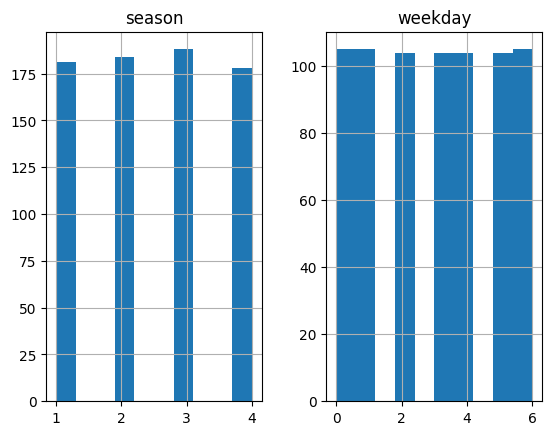

In [14]:
df1.hist()

In [15]:
df1.corr()

,season,weekday
season,1.00000,-0.00308
weekday,-0.00308,1.00000


#### Data Hour

In [16]:
df2 = pd.DataFrame(df2, columns = ("season", "hr"))
display(df2.groupby(by="hr").describe())

season                                             
    count      mean       std  min  25%  50%  75%  max
hr                                                    
0   726.0  2.500000  1.108898  1.0  2.0  3.0  3.0  4.0
1   724.0  2.497238  1.108869  1.0  2.0  2.5  3.0  4.0
2   715.0  2.511888  1.102994  1.0  2.0  3.0  3.0  4.0
3   697.0  2.539455  1.092796  1.0  2.0  3.0  3.0  4.0
4   697.0  2.552367  1.093567  1.0  2.0  3.0  4.0  4.0
5   717.0  2.513250  1.104286  1.0  2.0  3.0  3.0  4.0
6   725.0  2.497931  1.108261  1.0  2.0  3.0  3.0  4.0
7   727.0  2.496561  1.108284  1.0  2.0  3.0  3.0  4.0
8   727.0  2.496561  1.108284  1.0  2.0  3.0  3.0  4.0
9   727.0  2.496561  1.108284  1.0  2.0  3.0  3.0  4.0
10  727.0  2.496561  1.108284  1.0  2.0  3.0  3.0  4.0
11  727.0  2.496561  1.108284  1.0  2.0  3.0  3.0  4.0
12  728.0  2.494505  1.108910  1.0  2.0  2.5  3.0  4.0
13  729.0  2.496571  1.109550  1.0  2.0  3.0  3.0  4.0
14  729.0  2.496571  1.109550  1.0  2.0  3.0  3.0  4.0
15  729.0  2.496571  1.109550  1.0  2.0  3.0  3.0  4.0
16  730.0  2.494521  1.110171  1.0  2.0  2.5  3.0  4.0
17  730.0  2.494521  1.110171  1.0  2.0  2.5  3.0  4.0
18  728.0  2.495879  1.110155  1.0  2.0  2.5  3.0  4.0
19  728.0  2.495879  1.110155  1.0  2.0  2.5  3.0  4.0
20  728.0  2.495879  1.110155  1.0  2.0  2.5  3.0  4.0
21  728.0  2.495879  1.110155  1.0  2.0  2.5  3.0  4.0
22  728.0  2.495879  1.110155  1.0  2.0  2.5  3.0  4.0
23  728.0  2.495879  1.110155  1.0  2.0  2.5  3.0  4.0

In [17]:
df2.describe()

,season,hr
count,17379.000000,17379.000000
mean,2.501640,11.546752
std,1.106918,6.914405
min,1.000000,0.000000
25%,2.000000,6.000000
50%,3.000000,12.000000
75%,3.000000,18.000000
max,4.000000,23.000000


array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'hr'}>]], dtype=object)

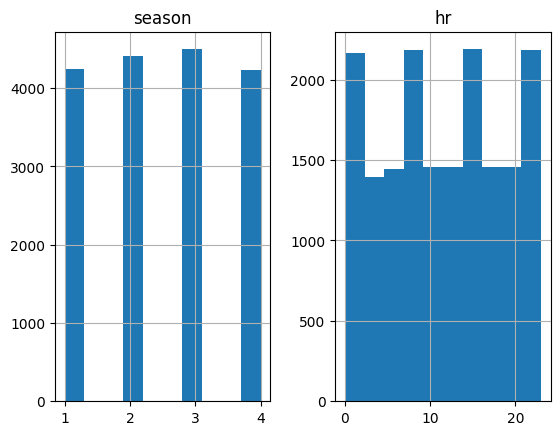

In [18]:
df2.hist()

In [19]:
df2.corr()

,season,hr
season,1.000000,-0.006117
hr,-0.006117,1.000000


**Insight:**
- Menghitung dataset day menggunakan statistika
- Menghitung dataset hour menggunakan statistika 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Cuaca apa yang paling sering muncul pada berbagai hari kerja?

In [20]:
df1

,season,weekday
0,1,6
1,1,0
2,1,1
3,1,2
4,1,3
...,...,...
726,1,4
727,1,5
728,1,6
729,1,0


In [21]:
byseason_df1 = df1.groupby(by="season").weekday.count().reset_index()
byseason_df1.rename(columns={
    "weekday": "hariKerja"
}, inplace=True)
byseason_df1.replace({1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"}, inplace=True)
byseason_df1

,season,hariKerja
0,Springer,181
1,Summer,184
2,Fall,188
3,Winter,178


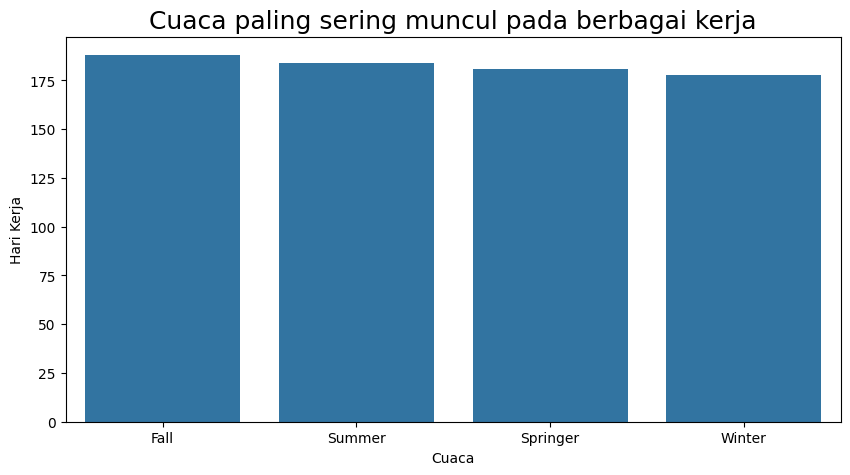

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="season", 
    y="hariKerja", 
    data=byseason_df1.sort_values(by="hariKerja", ascending=False))
plt.title("Cuaca paling sering muncul pada berbagai kerja", loc="center", fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel("Hari Kerja")
plt.xlabel("Cuaca")
plt.show()

### Pertanyaan 2: Cuaca apa yang paling sering muncul pada berbagai jam?

In [23]:
df2

,season,hr
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
...,...,...
17374,1,19
17375,1,20
17376,1,21
17377,1,22


In [24]:
df2['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [25]:
byseason_df2 = df2.groupby(by="season").hr.count().reset_index()
byseason_df2.rename(columns={
    "hr": "jam"
}, inplace=True)
byseason_df2.replace({1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"}, inplace=True)
byseason_df2

,season,jam
0,Springer,4242
1,Summer,4409
2,Fall,4496
3,Winter,4232


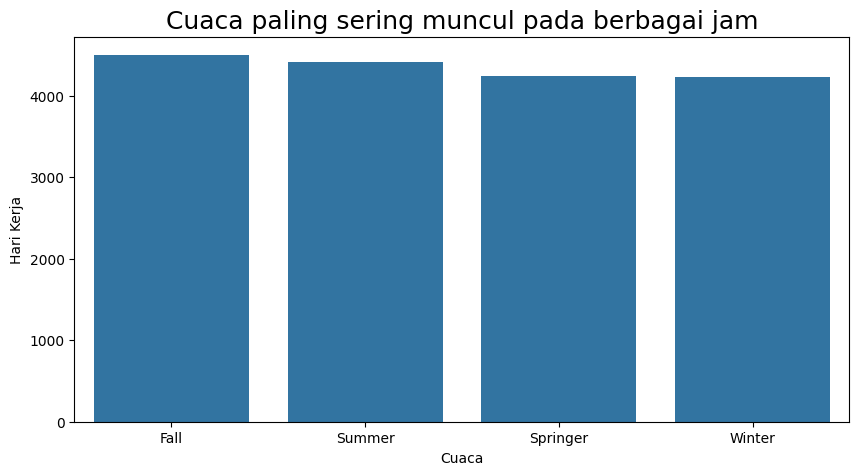

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="season", 
    y="jam", 
    data=byseason_df2.sort_values(by="jam", ascending=False))
plt.title("Cuaca paling sering muncul pada berbagai jam", loc="center", fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel("Hari Kerja")
plt.xlabel("Cuaca")
plt.show()

**Insight:**
- Merancang visualisasi mengenai cuaca paling sering muncul pada berbagai hari yang dihitungkan secara menyeluruh, di mana visualiasi dirancangkan berbentuk bar dengan label x season dan label y total banyaknya hari kerja.
- Merancang visualisasi mengenai cuaca paling sering muncul pada berbagai jam yang dihitungkan secara menyeluruh, di mana visualiasi dirancangkan berbentuk bar dengan label x season dan label y total banyaknya jam.

In [27]:
df2

,season,hr
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
...,...,...
17374,1,19
17375,1,20
17376,1,21
17377,1,22


In [28]:
df1_new = df1.rename(columns={"season":"season_day"})
df2_new = df2.rename(columns={"season":"season_hour"})
main_data = pd.concat([df1_new, df2_new], ignore_index=True)
display(main_data)

,season_day,weekday,season_hour,hr
0,1.0,6.0,NaN,NaN
1,1.0,0.0,NaN,NaN
2,1.0,1.0,NaN,NaN
3,1.0,2.0,NaN,NaN
4,1.0,3.0,NaN,NaN
...,...,...,...,...
18105,NaN,NaN,1.0,19.0
18106,NaN,NaN,1.0,20.0
18107,NaN,NaN,1.0,21.0
18108,NaN,NaN,1.0,22.0


In [29]:
main_data.to_csv("dashboard/main_data.csv", index=False)

In [30]:
main_data = pd.read_csv(r'dashboard\main_data.csv')
main_df = pd.DataFrame(main_data)
display(main_df)
df1 = main_df[['season_day', 'weekday']].dropna(axis=0, ignore_index=True)
df2 = main_df[['season_hour', 'hr']].dropna(axis=0, ignore_index=True)


,season_day,weekday,season_hour,hr
0,1.0,6.0,NaN,NaN
1,1.0,0.0,NaN,NaN
2,1.0,1.0,NaN,NaN
3,1.0,2.0,NaN,NaN
4,1.0,3.0,NaN,NaN
...,...,...,...,...
18105,NaN,NaN,1.0,19.0
18106,NaN,NaN,1.0,20.0
18107,NaN,NaN,1.0,21.0
18108,NaN,NaN,1.0,22.0


In [31]:
display(df1)
display(df2)

,season_day,weekday
0,1.0,6.0
1,1.0,0.0
2,1.0,1.0
3,1.0,2.0
4,1.0,3.0
...,...,...
726,1.0,4.0
727,1.0,5.0
728,1.0,6.0
729,1.0,0.0


,season_hour,hr
0,1.0,0.0
1,1.0,1.0
2,1.0,2.0
3,1.0,3.0
4,1.0,4.0
...,...,...
17374,1.0,19.0
17375,1.0,20.0
17376,1.0,21.0
17377,1.0,22.0


## Conclusion

- Tidak ada anomali terdeteksi pada dataset day setelah gathering, sehingga dapat dianalisis di tahap berikutnya. Berdasarkan hasil analisis yang dilakukan pada data day, Fall Season yang sering muncul pada berbagai hari.
- Tidak ada anomali terdeteksi pada dataset hour setelah gathering, sehingga dapat dianalisis di tahap berikutnya. Berdasarkan hasil analisis yang dilakukan pada data jam, Fall Season yang sering muncul pada berbagai jam.